Using this code you can find dominant colors present in any image

In [51]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [52]:
# pip install scikit-learn

In [53]:
img = Image.open(r"C:\Users\hp\OneDrive\Pictures\photo_2023-07-23_18-46-35.jpg")
img.show()


In [54]:
img_size = img.size

In [55]:
color = pd.DataFrame()
color['red'] = []
color['green'] = []
color['blue'] = []
r=[]
g=[]
b=[]

In [56]:
for i in range(0, img_size[0]):
    for j in range(0, img_size[1]):
        pixel = img.getpixel((i,j))
        r.append(pixel[0])
        g.append(pixel[1])
        b.append(pixel[2])
color['red'] = r
color['green'] = g
color['blue'] = b

In [57]:
color

,red,green,blue
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
1091835,253,201,125
1091836,253,202,123
1091837,253,202,123
1091838,253,202,123


In [58]:
# wcss = []
# for i in range(1,12):
#     kmeans = KMeans(n_clusters=i ,init='k-means++', random_state=42)
#     kmeans.fit(color)
#     wcss.append(kmeans.inertia_)

default value of number of colors is 4, if you wish to change the number of dominant colors then change the "n_cluster" = "value".

In [59]:
kmeans = KMeans(n_clusters=4 ,init='k-means++', random_state=42)
kmeans.fit(color)
cluster = kmeans.cluster_centers_

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
l=[]
for i in range(0, len(cluster)):
    temp = [int(cluster[i][0]), int(cluster[i][1]), int(cluster[i][2])]
    l.append(tuple(temp))
    temp = []

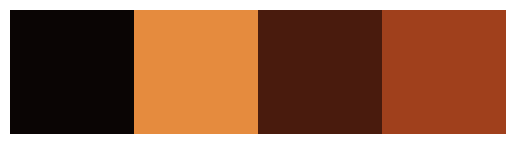

In [61]:

palette = np.array(l)[np.newaxis, :, :]

plt.imshow(palette)
plt.axis('off')
plt.show()